# 1.证明

# 1.1 梯度

逻辑回归对数化的损失函数可以表示为：
\begin{align}
\mathcal{l}(\boldsymbol{\beta})=\sum_{i=1}^{n}\left(-y_{i}\boldsymbol{\beta}^{T}\mathbf{x}_{i}+log(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})\right)
\end{align}
所以有：
\begin{align}
\nabla\mathcal{l}(\boldsymbol{\beta})&=\sum_{i=1}^{n}\left(-y_{i}\mathbf{x}_{i}+\frac{\mathbf{x}_{i}e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}}}{1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}}}\right)\nonumber\\
&=\sum_{i=1}^{n}\left(-y_{i}\mathbf{x}_{i}+\mu_{i}\mathbf{x}_{i}\right)\nonumber\\
&=\mathbf{X}^{T}(\boldsymbol{\mu}-\mathbf{y})\nonumber\\
\end{align}

# 1.2 Hesse矩阵

对数损失函数的Hesse矩阵满足：
\begin{align}
    \mathbf{H}=\nabla^2\mathcal{l}(\boldsymbol{\beta})&=\frac{\nabla\mathcal{l}(\boldsymbol{\beta})}{\partial\boldsymbol{\beta} }\nonumber\\
    &=\sum_{i=1}^{n}\left(\frac{\nabla(\mathbf{x}_{i}e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})-\nabla(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})(\mathbf{x}_{i}e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})}{(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})^2}\right)\nonumber\\
    &=\sum_{i=1}^{n}\left(\frac{\mathbf{x}_{i}e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}}\mathbf{x}_{i}^T(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})-\mathbf{x}_{i}e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}}e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}}\mathbf{x}_{i}^T}{(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})^2}\right)\nonumber\\
    &=\sum_{i=1}^{n}\left(\frac{\mathbf{x}_{i}e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}}\mathbf{x}_{i}^T}{(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})^2}\right)\nonumber\\
    &=\sum_{i=1}^{n}\left(\mathbf{x}_{i}\mathbf{x}_{i}^T\times\frac{e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}}}{(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})}\times \frac{1}{(1+e^{\boldsymbol{\beta}^{T}\mathbf{x}_{i}})}\right)\nonumber\\
    &=\sum_{i=1}^{n}\bigg(\mathbf{x}_{i}\mathbf{x}_{i}^T\times\mu_i(1-\mu_i)\bigg)\nonumber\\
    &=\mathbf{X}^{T}\mathbf{S}\mathbf{X}\nonumber
\end{align}

# 1.3 Hesse矩阵为正定矩阵

观察矩阵$\mathbf{S}$的特征，矩阵$\mathbf{S}$为一对角阵，且每一个元素都大于零，构造任一不全为0的列向量$\mathbf{y}$,$y\in \mathbb{R}^n$,于是有：
\begin{align}
    \mathbf{y}^T\mathbf{H}\mathbf{y}&=\mathbf{y}^T\mathbf{X}^T\mathbf{S}\mathbf{X}\mathbf{y}\nonumber\\
    &=\mathbf{v}^T\mathbf{S}\mathbf{v}\nonumber
\end{align}
其中，$\mathbf{X}\in \mathbf{R}^{m\times n}$,故$\mathbf{u}=\mathbf{X}\mathbf{y}\in  \mathbf{R}^{m},$m为样本维度，n为特征维度。于是：
\begin{align}
    \mathbf{y}^T\mathbf{H}\mathbf{y}=\sum_{i=1}^{m}\mu_{i}(1-\mu_{i})v_{i}^{2}\nonumber
\end{align}
由于$\mathbf{y}$不全为0，设其第j个维度不为0，那么在$\mathbf{X}$中只要第j列不全为0即可保证$\mathbf{y}^T\mathbf{H}\mathbf{y}>0$,这就要求$\mathbf{X}$必须是列满秩的，也即样本数应大于等于特征数，这与线性回归部分要求$\mathbf{X}^T\mathbf{X}$满秩是一致的。

# 2.梯度下降法求解逻辑回归问题

## 2.1数据未标准化的逻辑回归

如果不将数据进行标准化仍然有几个问题需要处理

In [1]:
import pandas as pd
import numpy as np
from math import exp
import matplotlib.pyplot as plt
dataset=pd.read_table(r'C:\Users\hp\Desktop\机器学习\wdbc.data',sep=',')
dataset.loc[dataset.shape[0]]=dataset.columns#将被作为列名的数据添加到样本集中
feature_number_int=range(1,31)
feature_number=[]
for i in range(len(feature_number_int)):
    feature_number.append("Feature"+str(feature_number_int[i]) )#新列名
dataset.columns=['ID','Diagnosis']+feature_number
dataset.iloc[dataset['Diagnosis']=='B',1]=1
dataset.iloc[dataset['Diagnosis']=='M',1]=0
dataset['changshu'] =1.0
label=dataset.iloc[:,1]
feature=dataset.iloc[:,2:]
feature=feature.astype(float)
A=np.mat(feature).T
y=np.mat(label).reshape(569,1)
beta=np.mat([[0.1]*31]).T
T=1000
s=0.1
def get_mu(A,beta):
    mu=[]
    for i in range(A.shape[1]):
        inner_product=-A[:,i].T*beta
        if inner_product<-20:
            inner_product=-20
        elif inner_product>20:
            inner_product=20
        m=1/(1+exp(inner_product))
        mu.append(m)
    return np.mat(mu).T
for i in range(T):
    mu=get_mu(A,beta)
    minus=mu-y
    nabla=A*minus
    beta=beta-s*nabla
print(beta)

[[17241.37225964224]
 [23816.558275988613]
 [100420.93029001408]
 [42273.29112773233]
 [160.28580464816642]
 [-64.75877118394168]
 [-306.2260865434493]
 [-130.4487293143204]
 [304.32907313359925]
 [127.02216636387377]
 [58.337404048863256]
 [1563.9366004401609]
 [-530.5398195629141]
 [-44409.28923726582]
 [8.5718155983079]
 [-20.155988649576507]
 [-38.28410730640716]
 [-4.66502871308884]
 [26.524300211121577]
 [1.9346643424764909]
 [18264.07028572239]
 [30201.597324712115]
 [101997.87680432528]
 [-57318.05078698588]
 [200.9146370378746]
 [-291.89353073316926]
 [-628.9457152644441]
 [-143.99025789128862]
 [418.398234026802]
 [119.09853335551799]
 [2259.000020574876]]


可以看到变量之间差异较大，所以对数据进行标准化。

## 2.2数据标准化后的逻辑回归

### 2.2.1 固定步长

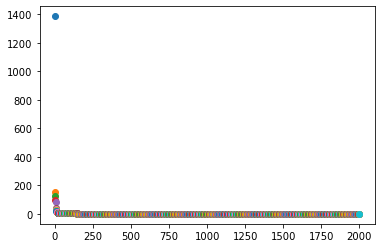

[[1.9065474534094002]
 [0.44985285018927695]
 [1.73318403380592]
 [0.6951964290616198]
 [-1.0134997485980632]
 [4.549777339608519]
 [-3.386461501569126]
 [-3.0854036986820184]
 [0.5857415189201542]
 [-0.4877239696309091]
 [-3.8123677379448853]
 [1.365526399741463]
 [0.9749838117710609]
 [-4.659758249501533]
 [-1.096120972824806]
 [-1.132468473052273]
 [2.426311901537285]
 [-2.623166948681939]
 [0.7605516630087075]
 [4.716868498313678]
 [-3.7885402687762535]
 [-3.8037375420964885]
 [-2.665760761532428]
 [-4.766682110441466]
 [0.2930941337977694]
 [1.4780213571917693]
 [-2.4276016774485725]
 [-0.9392077083009135]
 [-1.7961403151690034]
 [-3.321763426269593]
 [-1.3343305459715429]]


In [12]:
import pandas as pd
import numpy as np
from math import exp
import matplotlib.pyplot as plt
from sklearn import preprocessing

dataset=pd.read_table(r'C:\Users\hp\Desktop\机器学习\wdbc.data',sep=',')
dataset.loc[dataset.shape[0]]=dataset.columns#将被作为列名的数据添加到样本集中
feature_number_int=range(1,31)
feature_number=[]
for i in range(len(feature_number_int)):
    feature_number.append("Feature"+str(feature_number_int[i]) )#新列名
dataset.columns=['ID','Diagnosis']+feature_number
standard_dataset = preprocessing.scale(dataset.iloc[:,2:])
dataset.iloc[:,2:33]=standard_dataset
dataset.iloc[dataset['Diagnosis']=='B',1]=1
dataset.iloc[dataset['Diagnosis']=='M',1]=0
dataset['changshu'] =1.0
label=dataset.iloc[:,1]
feature=dataset.iloc[:,2:]
A=np.mat(feature).T
y=np.mat(label).reshape(569,1)
beta=np.mat([[0.1]*31]).T
T=2000
s=0.01
def get_mu(A,beta):
    mu=[]
    for i in range(A.shape[1]):
        inner_product=-A[:,i].T*beta
        if inner_product<-20:
            inner_product=-20
        elif inner_product>20:
            inner_product=20
        m=1/(1+exp(inner_product))
        mu.append(m)
    return np.mat(mu).T
plt.figure()
for i in range(T):
    mu=get_mu(A,beta)
    minus=mu-y
    nabla=A*minus
    beta=beta-s*nabla
    plt.scatter(i,np.linalg.norm(np.array(nabla).astype(float)))
    #plt.scatter(i,get_fvalue(A,y,beta))
plt.show()
print(beta)

### 2.2.2 线搜索确定步长

虽然固定步长从梯度的二范数上看一直在下降，但是对损失函数而言仍不能保证其每一步都在下降，所以设计了线搜索求步长的方法（提示：可能需要较长的时间去运行）

In [102]:
import pandas as pd
import numpy as np
from math import exp,log
dataset=pd.read_table(r'C:\Users\hp\Desktop\机器学习\wdbc.data',sep=',')
dataset.loc[dataset.shape[0]]=dataset.columns#将被作为列名的数据添加到样本集中
feature_number_int=range(1,31)
feature_number=[]
for i in range(len(feature_number_int)):
    feature_number.append("Feature"+str(feature_number_int[i]) )#新列名
dataset.columns=['ID','Diagnosis']+feature_number
standard_dataset = preprocessing.scale(dataset.iloc[:,2:])
dataset.iloc[:,2:33]=standard_dataset
dataset.iloc[dataset['Diagnosis']=='B',1]=1
dataset.iloc[dataset['Diagnosis']=='M',1]=0
dataset['changshu'] =1.0
label=dataset.iloc[:,1]
feature=dataset.iloc[:,2:]
A=np.mat(feature).T
y=np.mat(label).reshape(569,1)
beta=np.mat([[0.1]*31]).T
T=1000
def get_mu(A,beta):
    mu=[]
    for i in range(A.shape[1]):
        inner_product=-A[:,i].T*beta
        if inner_product<-20:
            inner_product=-20
        elif inner_product>20:
            inner_product=20
        m=1/(1+exp(inner_product))
        mu.append(m)
    return np.mat(mu).T
def get_fvalue(A,y,beta):
    for i in range(A.shape[1]):
        f=0
        for i in range(A.shape[1]):
            inner_product=A[:,i].T*beta
            if inner_product<-20:
                inner_product=0 
            if inner_product>20:
                inner_product=20
            f+=-inner_product*y[i,0]+log(1+exp(inner_product))
    return f
def get_s(A,y,beta,nabla):
    s=1
    while(get_fvalue(A,y,beta)<get_fvalue(A,y,beta-s*nabla)):
        s/=2
    return s
for i in range(T):
    mu=get_mu(A,beta)
    minus=mu-y
    nabla=A*minus
    s=get_s(A,y,beta,nabla)
    beta=beta-s*nabla
print(beta)

KeyboardInterrupt: 

# 3.牛顿法求解逻辑回归

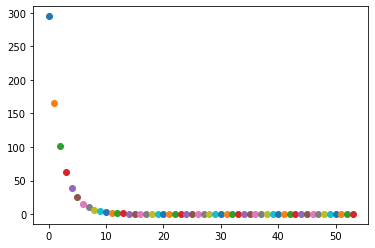

[[172.96632702518406]
 [-2.981951683692053]
 [-14.837259968380527]
 [-145.86314175372755]
 [-9.43194817075868]
 [27.149630038455687]
 [-18.00878429153226]
 [-13.032377809601305]
 [5.12251216989578]
 [-2.433239749638907]
 [-4.634600865053469]
 [3.6377609671311486]
 [20.06319375804454]
 [-53.56885281995248]
 [0.7532582908393172]
 [-16.482131074678847]
 [23.028213196603264]
 [-21.61984542299492]
 [7.187231309736435]
 [25.110714447343888]
 [-75.721187374234]
 [-8.027544495507398]
 [-26.336399773334197]
 [66.86664401209238]
 [4.69575568917506]
 [12.214880851357005]
 [-18.02580686567683]
 [2.182078746710893]
 [-11.550313375043462]
 [-15.782687316226719]
 [-12.544457375752199]]


In [16]:
import pandas as pd
import numpy as np
from math import exp
import matplotlib.pyplot as plt
from sklearn import preprocessing
dataset=pd.read_table(r'C:\Users\hp\Desktop\机器学习\wdbc.data',sep=',')
dataset.loc[dataset.shape[0]]=dataset.columns#将被作为列名的数据添加到样本集中
feature_number_int=range(1,31)
feature_number=[]
for i in range(len(feature_number_int)):
    feature_number.append("Feature"+str(feature_number_int[i]) )#新列名
dataset.columns=['ID','Diagnosis']+feature_number
standard_dataset = preprocessing.scale(dataset.iloc[:,2:])
dataset.iloc[:,2:33]=standard_dataset
dataset.iloc[dataset['Diagnosis']=='B',1]=1
dataset.iloc[dataset['Diagnosis']=='M',1]=0
dataset['changshu'] =1.0
label=dataset.iloc[:,1]
feature=dataset.iloc[:,2:]
A=np.mat(feature).T
y=np.mat(label).reshape(569,1)
beta=np.mat([[-0.1]*31]).T
def get_diag(A,beta):
    s_mu,mu_list=[],[]
    for i in range(A.shape[1]):
        inner_product=float(-A[:,i].T*beta)
        if inner_product<-10:
            inner_product=-10
        elif inner_product>10:
            inner_product=10
        mu=1/(1+exp(inner_product))
        mu_list.append(mu)
        s=mu*(1-mu)
        s_mu.append(s)
    S=np.diag(s_mu)
    return np.mat(S),np.mat(mu_list).T
plt.figure()
for i in range(500):
    S,mu=get_diag(A,beta)
    H_0=(A*S*A.T).astype(float)
    H=H_0.I
    minus=mu-y
    nabla=A*minus
    beta=beta-0.5*H*nabla
    plt.scatter(i,np.linalg.norm(np.array(nabla).astype(float)))
    if np.linalg.norm(np.array(nabla).astype(float), ord=2)<= 0.2:
         break
plt.show()
print(beta)

可以直观地感受到，自己写出的梯度下降和牛顿法与第二次作业都有着不小的差距，但是梯度下降方法的结果在量级以及符号上与第二次作业大致相似，牛顿法却出现了较大的不同。由于目标函数是凸函数所以可以排除是落入了局部最小的原因，从输出的图形上看结果确实在收敛，所以猜想是在最优解附近发生震荡，为了验证这一猜想又改变了步长（从1变成了0.5），但是仍然没有很好的效果，但是与之前相比更逼近作业二的最优解，所以从一定程度上验证了这个猜想的正确性。